## MNIST machine learning exercise

**NOTE: THis is an updated version of the original example in W08 DNN. The change here is in the Deep and Wide network... I've added a 'flatten' layer between input and normalization layers -- and set the input layer to now accept a 28,28 image. This eliminated the need to reshape the input data as was done in the original example. It's another way of handling this -- and I think it's a bit cleaner.**

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database);

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

You will need to have tensorflow installed. It is recommended that you use pip to install this library. 

```bash
pip install tensorflow
pip install tensorflow_datasets
```

> 🧠
>  You can control the verbosity of TensorFlow logs by setting the `TF_CPP_MIN_LOG_LEVEL` environment variable.
> ```python
> # import os
> # os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # set to 0 to see all logs, 4 to see only errors
> ```

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

epoch_num = 10
batch_size_num = 500


In [2]:
import tensorflow as tf
#from tensorflow import keras  # see https://www.tensorflow.org/install
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow_datasets as tfds # see https://www.tensorflow.org/datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

tf.__version__

'2.16.1'

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(len(X_train), X_train.shape)
print(len(y_train), y_train.shape)
print(len(X_test), X_test.shape)
print(len(y_test), y_test.shape)

60000 (60000, 28, 28)
60000 (60000,)
10000 (10000, 28, 28)
10000 (10000,)


In [5]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [6]:
np. set_printoptions(linewidth=120) # increase output display width (so it's easier to read the 28x28 arrays below)

print(X_train[0]) # display the data for the first image in our training set
print(f'\nThe label for this image is {y_train[0]:d}') # display the label for the first image in our training set1
print("Input shape is", X_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

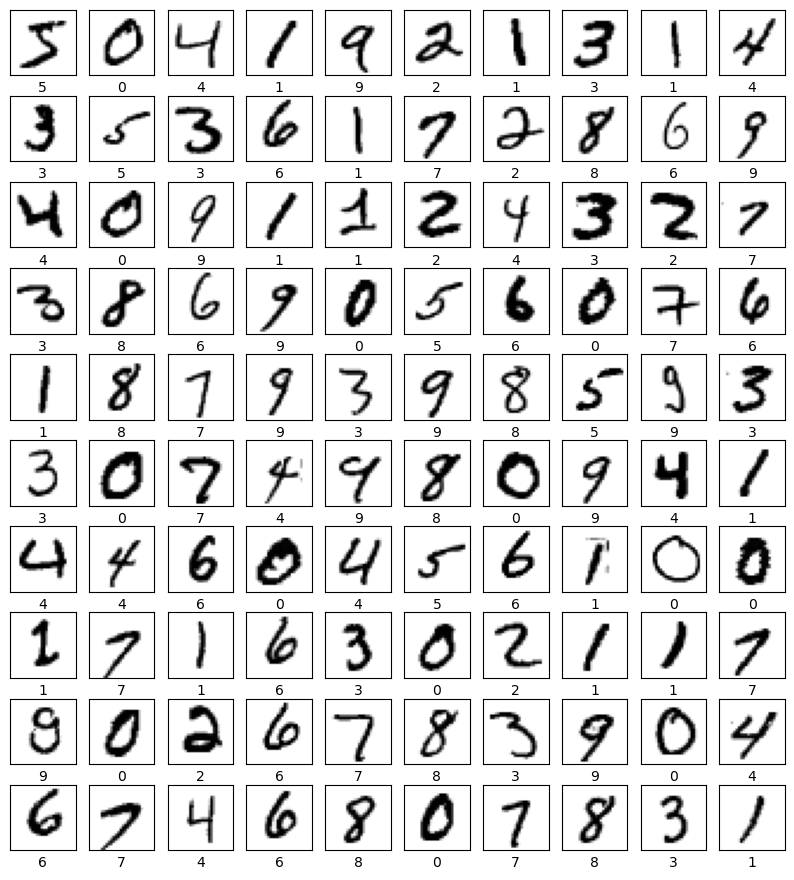

In [7]:
plt.figure(figsize=(10,11)) # make the figure a little taller than wide - to accommodate the labels
i = 0
#for image, label in mnist_train.take(5):
for i, image in enumerate(X_train[0:100]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Deep Network

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
%%time
# create model structure
deep_model = models.Sequential()
deep_model.add(layers.Flatten())
#deep_model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))

#deep_model.add(keras.layers.Input(shape=(28, 28)))
deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 
deep_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

CPU times: user 223 ms, sys: 32.8 ms, total: 255 ms
Wall time: 106 ms


In [10]:
%%time

# fit the model
history = deep_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epoch_num, batch_size=batch_size_num
)

# 
deep_model.summary()

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3967 - loss: 8.3254 - val_accuracy: 0.8171 - val_loss: 0.5996
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8402 - loss: 0.5273 - val_accuracy: 0.8855 - val_loss: 0.3820
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8959 - loss: 0.3521 - val_accuracy: 0.9077 - val_loss: 0.3103
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9184 - loss: 0.2742 - val_accuracy: 0.9211 - val_loss: 0.2683
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9330 - loss: 0.2283 - val_accuracy: 0.9287 - val_loss: 0.2439
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9417 - loss: 0.1976 - val_accuracy: 0.9321 - val_loss: 0.2287
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9486 - loss: 0.1749 - val_accuracy: 0.9373 - val_loss: 0.2138
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9543 - loss: 0.1563 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (500, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (500, 64)              │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (500, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (500, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (500, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (500, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (500, 10)              │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,592 (791.38 KB)

 Trainable params: 67,530 (263.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 135,062 (527.59 KB)

CPU times: user 17.2 s, sys: 7.29 s, total: 24.5 s
Wall time: 15.7 s


In [11]:
%%time

# evaluate the model

val_loss, val_accuracy = deep_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.2020
Validation accuracy: 0.9435
CPU times: user 915 ms, sys: 502 ms, total: 1.42 s
Wall time: 1.57 s


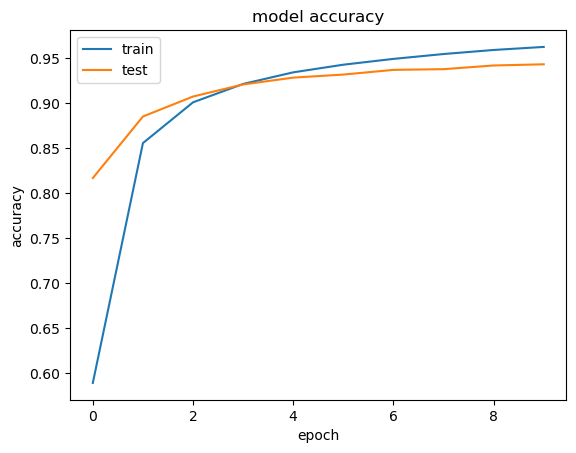

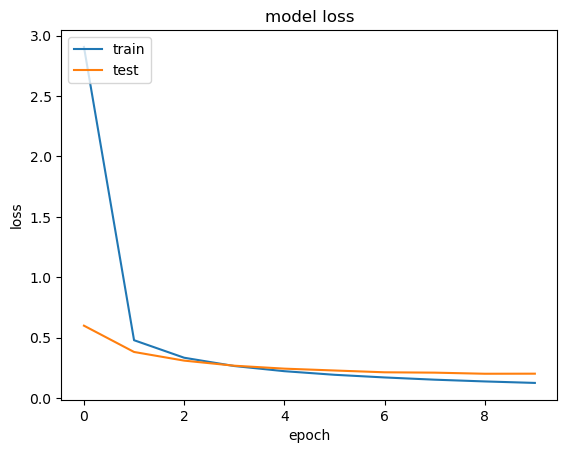

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


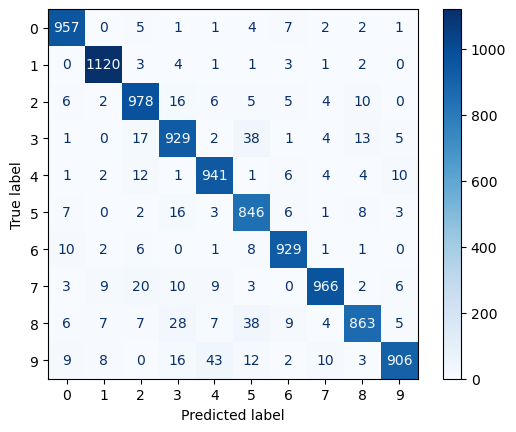

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = deep_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Wide Network

In [14]:
%%time

input_shape = (28,28,1) # 28x28 pixel images with 1 color channel (grayscale)

from keras.models import Model
from keras.layers import Flatten, Input, Dense, concatenate
from keras.utils import plot_model
#Define the model: for multi-class

inputs = Input(shape=(28,28))
flatten = Flatten()(inputs)
layer1 = Dense(512, activation='relu')(flatten)
outputs = Dense(10, activation="softmax")(layer1)
wide_model = Model(inputs=inputs, outputs=outputs)

wide_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

wide_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 157 ms, sys: 8.5 ms, total: 166 ms
Wall time: 57.1 ms


In [15]:
%%time

# Fit the model

history = wide_model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8588 - loss: 10.1476 - val_accuracy: 0.9411 - val_loss: 0.9007
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9511 - loss: 0.5901 - val_accuracy: 0.9532 - val_loss: 0.5018
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9645 - loss: 0.2809 - val_accuracy: 0.9536 - val_loss: 0.4232
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9703 - loss: 0.2084 - val_accuracy: 0.9598 - val_loss: 0.4192
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9711 - loss: 0.1958 - val_accuracy: 0.9532 - val_loss: 0.4449
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9713 - loss: 0.1863 - val_accuracy: 0.9576 - val_loss: 0.4250
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9724 - loss: 0.1725 - val_accuracy: 0.9624 - val_loss: 0.3603
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9740 - loss: 0.1670 - val_accuracy: 0

In [16]:
%%time

# evaluate the model
val_loss, val_accuracy = wide_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.4148
Validation accuracy: 0.9634
CPU times: user 774 ms, sys: 497 ms, total: 1.27 s
Wall time: 1.38 s


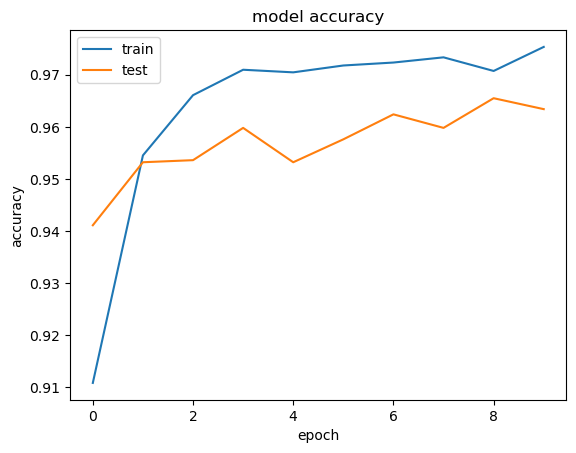

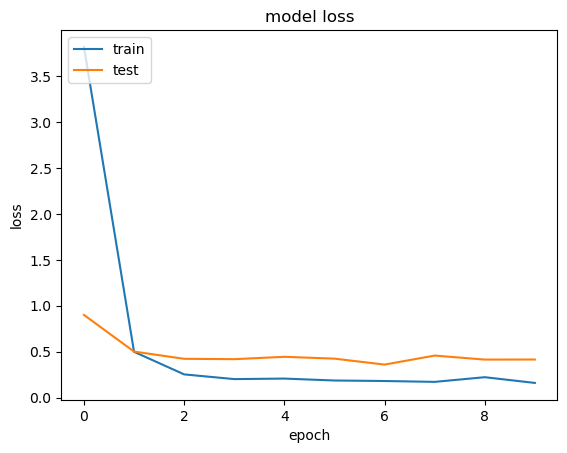

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


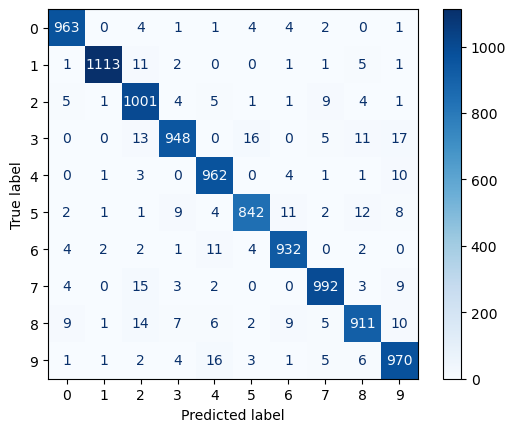

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = wide_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Wide and Deep Network

In [19]:
#X_train_flattened = X_train.reshape(-1, 28*28)
#X_test_flattened = X_test.reshape(-1, 28*28)


In [20]:
%%time

#Define the model: for multi-class

from keras.models import Model
from keras.layers import Input, Dense, concatenate, Normalization
from keras.utils import plot_model


CPU times: user 15 µs, sys: 41 µs, total: 56 µs
Wall time: 52.9 µs


In [21]:
%%time

input_ = tf.keras.layers.Input(shape=(28,28,))
flattened = tf.keras.layers.Flatten()(input_)
normalized = layers.Normalization()(flattened)
deep1 = layers.Dense(400, activation="relu")(normalized)
deep2 = layers.Dense(200, activation="relu")(deep1)
deep3 = layers.Dense(100, activation="relu")(deep2)
deep4 = layers.Dense(50, activation="relu")(deep2)
wide1 = layers.Dense(1000, activation="relu")(normalized)
concat = layers.Concatenate()([deep3, wide1])
output = layers.Dense(10, activation="softmax")(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=100)

history.history['accuracy']

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8661 - loss: 11.1198 - val_accuracy: 0.9492 - val_loss: 0.6887
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9590 - loss: 0.4785 - val_accuracy: 0.9539 - val_loss: 0.5211
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9690 - loss: 0.2623 - val_accuracy: 0.9617 - val_loss: 0.4399
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9710 - loss: 0.2248 - val_accuracy: 0.9538 - val_loss: 0.5569
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9706 - loss: 0.2612 - val_accuracy: 0.9573 - val_loss: 0.4578
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9736 - loss: 0.2004 - val_accuracy: 0.9590 - val_loss: 0.5152
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9723 - loss: 0.2620 - val_accuracy: 0.9629 - val_loss: 0.4768
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9718 - loss: 0.2408 - val_acc

[0.9178000092506409,
 0.9612166881561279,
 0.9692999720573425,
 0.9707833528518677,
 0.9712166786193848,
 0.9739166498184204,
 0.972083330154419,
 0.9730833172798157,
 0.9765166640281677,
 0.9765499830245972]

In [22]:
%%time

input_ = tf.keras.layers.Input(shape=(28,28,))
flattened = tf.keras.layers.Flatten()(input_)
deep1 = layers.Dense(400, activation="relu")(flattened)
deep2 = layers.Dense(200, activation="relu")(deep1)
deep3 = layers.Dense(100, activation="relu")(deep2)
deep4 = layers.Dense(50, activation="relu")(deep2)
wide1 = layers.Dense(1000, activation="relu")(flattened)
concat = layers.Concatenate()([deep3, wide1])
output = layers.Dense(10, activation="softmax")(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=100)

history.history['accuracy']

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8632 - loss: 11.9915 - val_accuracy: 0.9466 - val_loss: 0.7581
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9578 - loss: 0.4877 - val_accuracy: 0.9550 - val_loss: 0.5165
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9694 - loss: 0.2390 - val_accuracy: 0.9546 - val_loss: 0.4557
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9700 - loss: 0.2314 - val_accuracy: 0.9591 - val_loss: 0.4848
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9710 - loss: 0.2339 - val_accuracy: 0.9572 - val_loss: 0.5409
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9711 - loss: 0.2629 - val_accuracy: 0.9609 - val_loss: 0.5125
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9731 - loss: 0.2384 - val_accuracy: 0.9599 - val_loss: 0.4840
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9750 - loss: 0.2202 - val_acc

[0.9156833291053772,
 0.9617499709129333,
 0.9698500037193298,
 0.9701333045959473,
 0.9713666439056396,
 0.9721166491508484,
 0.9731500148773193,
 0.9741666913032532,
 0.9749333262443542,
 0.9773333072662354]

In [23]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 784)       │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 400)       │    314,000 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 200)       │     80,200 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 100)       │     20,100 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1000)      │    785,000 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1100)      │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 10)        │     11,010 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,630,932 (13.85 MB)

 Trainable params: 1,210,310 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,420,622 (9.23 MB)

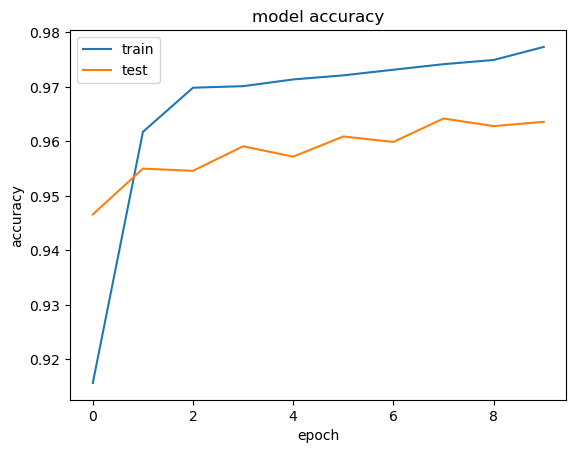

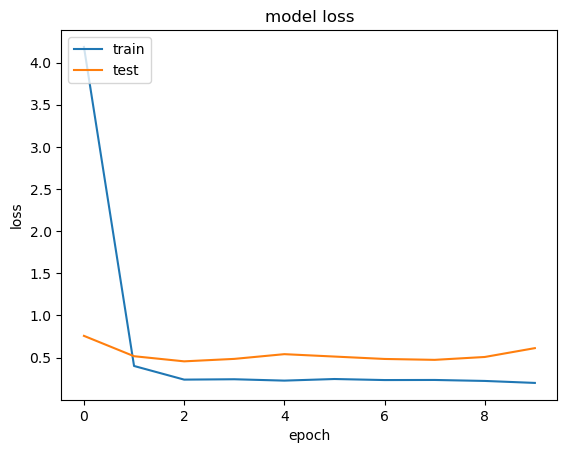

In [24]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
%%time

# evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.6114
Validation accuracy: 0.9636
CPU times: user 1.37 s, sys: 520 ms, total: 1.89 s
Wall time: 1.64 s


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


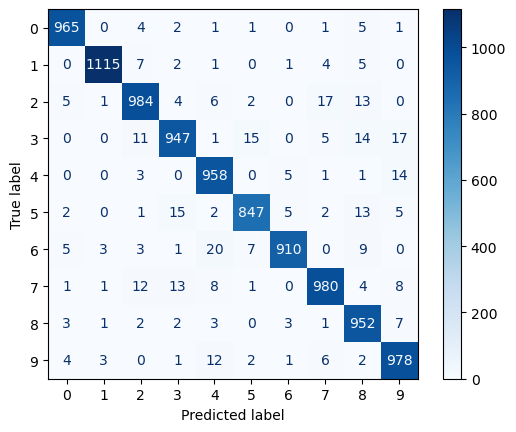

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()